<a href="https://colab.research.google.com/github/ParkSeonungHun/Hun/blob/main/python_basic/Legend_%EA%B0%80%EC%9D%B4%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Legend guide

Matplotlib에서 유연하게 범례를 생성합니다.

이 Legend 가이드는에서 사용할 수있는 문서의 확장입니다 legend().이 가이드를 진행하기 전에 해당 문서의 내용을 잘 알고 있는지 확인하십시오.

이 가이드에서는 몇 가지 일반적인 용어를 사용하며 명확성을 위해 여기에 설명되어 있습니다.

Legnd 항목

Legnd는 하나 이상의 Legnd 항목으로 구성됩니다. 항목은 정확히 하나의 키와 하나의 레이블로 구성됩니다.

Legend 키

각 범례 레이블 왼쪽의 색상 / 패턴 마커입니다.
Legend 레이블

키가 나타내는 핸들을 설명하는 텍스트입니다.
Legend 핸들

Legend에서 적절한 항목을 생성하는 데 사용되는 원래 개체입니다.

## Legend 항목 제어

legend()인수없이 호출 하면 범례 핸들과 관련 레이블을 자동으로 가져옵니다. 이 기능은 다음과 같습니다.

In [ ]:
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

이 get_legend_handles_labels()함수는 결과 범례에 대한 항목을 생성하는 데 사용할 수있는 축에 존재하는 핸들 / 아티스트 목록을 반환합니다. 그러나 모든 아티스트를 범례에 추가 할 수있는 것은 아닙니다. (자세한 내용 은 범례에 추가하기 위해 특별히 아티스트 생성 (일명 프록시 아티스트) 참조).

레이블로 빈 문자열이 있거나 "_"로 시작하는 레이블이있는 아티스트는 무시됩니다.

범례에 추가되는 내용을 완전히 제어하려면 적절한 핸들을 legend()다음으로 직접 전달하는 것이 일반적입니다 .

In [ ]:
line_up, = plt.plot([1, 2, 3], label='Line 2')
line_down, = plt.plot([3, 2, 1], label='Line 1')
plt.legend(handles=[line_up, line_down])

경우에 따라 핸들의 레이블을 설정할 수 없으므로 레이블 목록을 다음으로 전달할 수 있습니다 legend().

In [ ]:
line_up, = plt.plot([1, 2, 3], label='Line 2')
line_down, = plt.plot([3, 2, 1], label='Line 1')
plt.legend([line_up, line_down], ['Line Up', 'Line Down'])

## Legend에 추가하기 위해 특별히 아티스트 만들기 (일명 프록시 아티스트)

어떤 아티스트를 작성하는 것이 필요하므로 모든 핸들이 자동으로 범례 항목으로 설정할 수 있습니다 할 수 있습니다 . Legend 핸들은 사용하기 위해 Figure 또는 Axes에 존재할 필요가 없습니다.

빨간색으로 표시되는 일부 데이터에 대한 항목이있는 Legend를 만들고 싶다고 가정합니다.

In [ ]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_patch = mpatches.Patch(color='red', label='The red data')
plt.legend(handles=[red_patch])

plt.show()

지원되는 많은 Legend 핸들이 있습니다. 색상 패치를 만드는 대신 마커가있는 선을 만들 수 있습니다.

In [ ]:
import matplotlib.lines as mlines

blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          markersize=15, label='Blue stars')
plt.legend(handles=[blue_line])

plt.show()

## Legend 위치

Legend의 위치는 키워드 인수 loc 로 지정할 수 있습니다 . 자세한 내용은에서 설명서 legend()를 참조하십시오.

이 bbox_to_anchor키워드는 수동 범례 배치에 대한 높은 수준의 제어를 제공합니다. 예를 들어 좌표축 범례를 좌표축의 모서리 대신 Figure의 오른쪽 상단 모서리에 배치하려면 모서리의 위치와 해당 위치의 좌표계를 지정하면됩니다

In [ ]:
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

사용자 정의 범례 배치의 추가 예 :

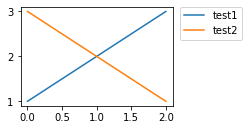

In [7]:
plt.plot([1, 2, 3], label="test1")
plt.plot([3, 2, 1], label="test2")

# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(223)
plt.plot([1, 2, 3], label="test1")
plt.plot([3, 2, 1], label="test2")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

## 동일한 Axes에 있는 여러 Legend

때때로 범례 항목을 여러 범례로 분할하는 것이 더 명확합니다. 이 작업을 수행하는 본능적 인 접근 방식은 legend()함수를 여러 번 호출하는 것이지만 Axes에는 하나의 범례 만 존재한다는 것을 알 수 있습니다. 이것은 legend()Axes의 최신 핸들로 범례를 업데이트하기 위해 반복적으로 호출 할 수 있도록 수행되었습니다 . 이전 범례 인스턴스를 유지하려면 Axes에 수동으로 추가해야합니다.

In [ ]:
line1, = plt.plot([1, 2, 3], label="Line 1", linestyle='--')
line2, = plt.plot([3, 2, 1], label="Line 2", linewidth=4)

# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc='upper right')

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend(handles=[line2], loc='lower right')

plt.show()

## Legend 핸들러

Legend 항목을 만들기 위해 핸들은 적절한 HandlerBase하위 클래스에 대한 인수로 제공됩니다 . 핸들러 서브 클래스의 선택은 다음 규칙에 의해 결정됩니다.

1. 키워드 get_legend_handler_map()의 값으로 업데이트 하십시오 handler_map.
2. 새로만든 handler_map이 있는지 확인하세요.
3. 핸들이 새로만든 handler_map 타입인지 확인하세요.
4. 핸들의 mro에있는 새로 생성된 유형에 있는지 확인하세요.

완전성을 위해이 논리는 대부분 get_legend_handler().

이러한 모든 유연성은 고유 한 유형의 범례 키에 대한 사용자 지정 처리기를 구현하는 데 필요한 후크가 있음을 의미합니다.

사용자 지정 처리기를 사용하는 가장 간단한 예는 기존 legend_handler.HandlerBase하위 클래스 중 하나를 인스턴스화하는 것입니다 . 단순함을 위해 numpoints 인수 legend_handler.HandlerLine2D 를 허용하는 것을 선택합시다 (numpoints는 legend()편의를 위해 함수 의 키워드이기도 합니다). 그런 다음 인스턴스 매핑을 범례에 대한 키워드로 Handler에 전달할 수 있습니다.

In [ ]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot([3, 2, 1], marker='o', label='Line 1')
line2, = plt.plot([1, 2, 3], marker='o', label='Line 2')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

보시다시피 "Line 1"에는 이제 4 개의 마커 지점이 있으며 "Line 2"에는 2 (기본값)가 있습니다. 위의 코드를 시도하고지도의 키를에서 line1로 변경하십시오 type(line1). 이제 두 Line2D인스턴스가 4 개의 마커를 얻는 방법을 확인합니다 .

오류 막대, 줄기 플롯 및 히스토그램과 같은 복잡한 플롯 유형에 대한 핸들러와 함께 기본값 handler_map에는 지정된 튜플의 각 항목에 대해 핸들을 서로 위에 단순히 플롯 하는 특수 tuple핸들러 ( legend_handler.HandlerTuple)가 있습니다. 다음 예제는 두 개의 범례 키를 서로 결합하는 방법을 보여줍니다.

In [ ]:
from numpy.random import randn

z = randn(10)

red_dot, = plt.plot(z, "ro", markersize=15)
# Put a white cross over some of the data.
white_cross, = plt.plot(z[:5], "w+", markeredgewidth=3, markersize=15)

plt.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])

이 legend_handler.HandlerTuple클래스를 사용하여 동일한 항목에 여러 범례 키를 할당 할 수도 있습니다.

In [ ]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

p1, = plt.plot([1, 2.5, 3], 'r-d')
p2, = plt.plot([3, 2, 1], 'k-o')

l = plt.legend([(p1, p2)], ['Two keys'], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)})

사용자 정의 Legend 핸들러 구현하기 

핸들을 legend 키로 바꾸는 사용자 지정 처리기를 구현할 수 있습니다 (핸들이 반드시 matplotlib 아티스트 일 필요는 없습니다). 핸들러는 legend_artist범례가 사용할 단일 아티스트를 반환 하는 메서드를 구현해야합니다 . 에 대한 필수 서명은에 legend_artist문서화되어 legend_artist있습니다.

In [ ]:
import matplotlib.patches as mpatches


class AnyObject:
    pass


class AnyObjectHandler:
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpatches.Rectangle([x0, y0], width, height, facecolor='red',
                                   edgecolor='black', hatch='xx', lw=3,
                                   transform=handlebox.get_transform())
        handlebox.add_artist(patch)
        return patch

plt.legend([AnyObject()], ['My first handler'],
           handler_map={AnyObject: AnyObjectHandler()})

또는 handler_map 키워드를 항상 AnyObject수동으로 설정할 필요없이 전역 적으로 인스턴스를 수락하기를 원했다면 다음을 사용 하여 새 핸들러를 등록 할 수 있습니다.

In [14]:
from matplotlib.legend import Legend
Legend.update_default_handler_map({AnyObject: AnyObjectHandler()})

여기에있는 힘은 분명하지만 이미 많은 핸들러가 구현되어 있으며 달성하려는 것이 이미 기존 클래스에서 쉽게 가능할 수 있음을 기억하십시오. 예를 들어 직사각형이 아닌 타원형 범례 키를 생성하려면 다음을 수행하십시오.

In [ ]:
from matplotlib.legend_handler import HandlerPatch


class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=width + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]


c = mpatches.Circle((0.5, 0.5), 0.25, facecolor="green",
                    edgecolor="red", linewidth=3)
plt.gca().add_patch(c)

plt.legend([c], ["An ellipse, not a rectangle"],
           handler_map={mpatches.Circle: HandlerEllipse()})